Investigate the effect of school status on smartwatch wear rate

In [1]:
%load_ext autoreload
%autoreload 2

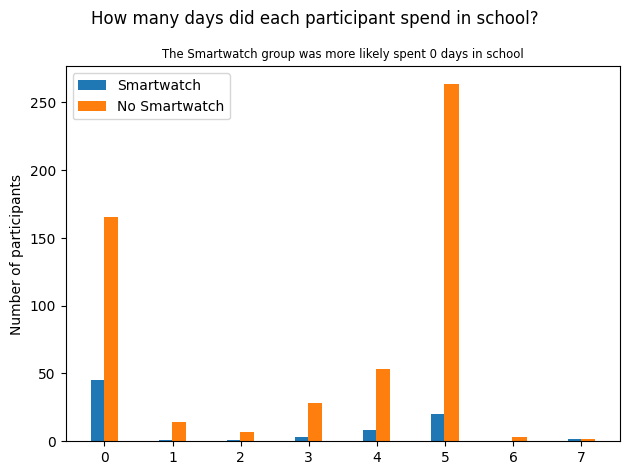

In [81]:
"""
Make a histogram of how many days each participant spent in school

"""
import numpy as np
import matplotlib.pyplot as plt

from ema import read

schooldays_with_watch = read.n_days_in_school(subset="smartwatch")
schooldays_no_watch = read.n_days_in_school(subset="not smartwatch")

fig, axis = plt.subplots()
bins1 = np.sort(np.concatenate([np.arange(8) - 0.2, np.arange(8) + 0.01]))
bins2 = np.sort(np.concatenate([np.arange(8) - 0.01, np.arange(8) + 0.2]))
axis.hist(schooldays_with_watch.values(), bins=bins1, label="Smartwatch")
axis.hist(schooldays_no_watch.values(), bins=bins2, label="No Smartwatch")

fig.suptitle("How many days did each participant spend in school?")
axis.set_title(
    "The Smartwatch group was more likely spent 0 days in school", fontsize="small"
)
axis.set_ylabel("Number of participants")
axis.legend()

fig.tight_layout()

fig.savefig("img/schooldays.png")

Text(0.5, 1.0, 'Smartwatch Only')

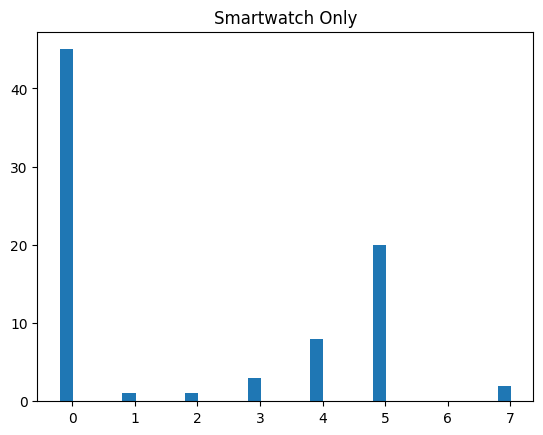

In [45]:
plt.hist(schooldays_with_watch.values(), bins=bins1)
plt.title("Smartwatch Only")

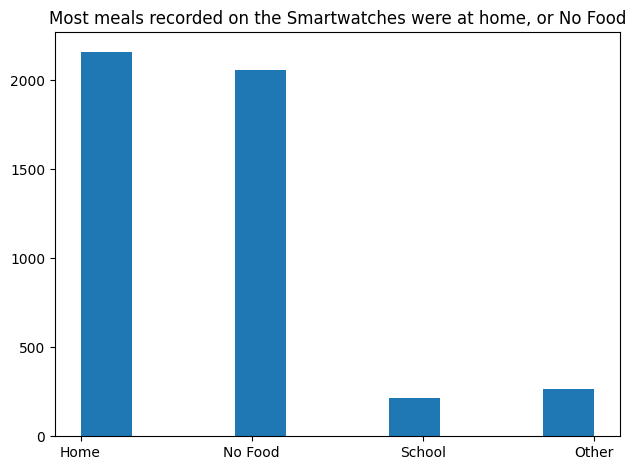

In [79]:
"""
Find what proportion of entries were at home/school/other, overall and as a function of how many days spent in school

"""
from ema import clean

meal_types = {"Meal", "Drink", "Snack", "No food/drink"}
meal_info = clean.cleaned_smartwatch(keep_catchups=False)

plt.hist(meal_info[meal_info["meal_type"].isin(meal_types)]["location"])

plt.xticks(plt.gca().get_xticks(), ["Home", "No Food", "School", "Other"])

plt.title("Most meals recorded on the Smartwatches were at home, or No Food")

plt.tight_layout()

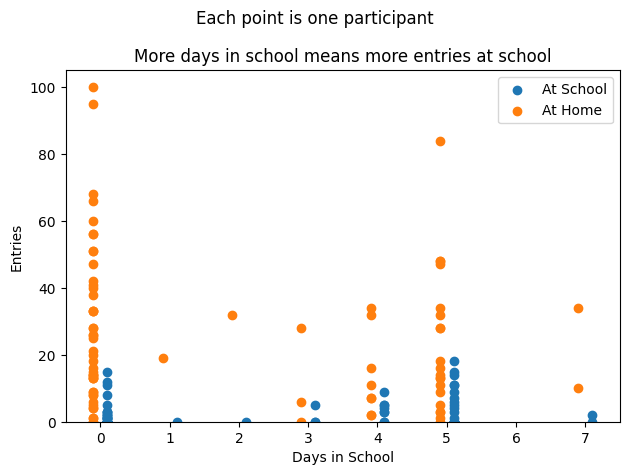

In [80]:
"""
Find the fraction of entries that were at school or at home for each participant and plot it against how many days they spent in school

"""
fig, axis = plt.subplots()

days_in_school = np.array(list(schooldays_with_watch.values()))
entries_in_school = np.zeros_like(days_in_school)
entries_at_home = np.zeros_like(days_in_school)

for i, participant in enumerate(schooldays_with_watch):
    df_slice = meal_info.query("p_id == @participant")

    # Find how many entries were at school
    n_in_school = (df_slice["location"] == "School").sum()

    # Find how many entries were at home
    n_at_home = (df_slice["location"] == "Home").sum()

    entries_in_school[i] = n_in_school
    entries_at_home[i] = n_at_home


axis.scatter(days_in_school + 0.1, entries_in_school, label="At School")
axis.scatter(days_in_school - 0.1, entries_at_home, label="At Home")
axis.set_xlim(-0.5, 7.5)
axis.set_ylim(0.0, axis.get_ylim()[1])
axis.set_xlabel("Days in School")
axis.set_ylabel("Entries")

axis.legend()

fig.suptitle("Each point is one participant")
axis.set_title("More days in school means more entries at school")

fig.tight_layout()